In [1]:
import filepaths

import numpy as np
import pint


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

import numpy as np
import pint

u = pint.get_application_registry()
Q = pint.Quantity


# '''
#         # Начальные данные ---------#------------------------------------------------------+
#                                     #                                                      |
#         fp_0,                       # Давление свежего пара после гидр. сопротивления      |
#         fh_0,                       # Энтальпия свежего пара                             |
#         n,                          # Номинальная частота вращения                         |
#         G_0,                        # Расход пара через группу ступеней                    |
#         p_z,                        # Давление за группой ступеней                         |
#                                     #                                                      |
#         # Варируемые величины ------#------------------------------------------------------+
#                                     #                                                      |
#         Z,                          # Предполагаемое число ступеней                        |
#         alpha_1eef,                 # Эффективный угол выхода потока из сопловой решетки   |
#         etaHPC_oi,                  # Внутренний КПД ЦВД                                   |
#                                     #                                                      |
#         # Параметры первой ступени -#------------------------------------------------------+
#                                     #                                                      |
#         d_1,                        # Средней диаметр первой ступени                       |
#         rho_k,                      # Степень реактивности в корне первой ступени          |
#         phi = 0.95,                 # Коэффициент скорости сопловой решетки первой ступени |
#         mu = 0.96,                  # Коэффициент расхода сопловой решетки первой ступени  |
#         Delta = Q(0.003, "meter"),  # Перекрыша между лопаткиами первой ступени            |
#                                     #                                                      |
#         # --------------------------#------------------------------------------------------+
#         '''


Files loaded


In [2]:
splits_data = []
d_split = np.arange(0.4, 1.3, 0.1)

color_split = [
    'b',
    'c',
    'g',
    'k',
    'm',
    'r',
    'w',
    "y"
]

d_split = Q(d_split, "meter")

Point_0_ = filepaths.TCPv2.ThPoint(p=Q(9, "MPa"),t=Q(571, "degC"))
Point_0  = filepaths.TCPv2.ThPoint(p=Q(8.73, "MPa"), h=Point_0_.h())

for i in range(0, len(d_split)):
    splits_data.append(filepaths.spl.calculate_hpc_split_in_ranges(
        d_1 = d_split[i],        
        rho_k_range=(0.03,0.07, 0.01),      
        alpha_1eef_range=(9,20, 1),       
        
        fp_0        = Q(1.8, "MPa"),
        fh_0        = Q(3145.1, "kJ/kg"),
        
        n           = Q(50, "1/s"),
        G_0         = Q(38.88, "kg/s"),
        p_z         = Q(0.485, "MPa"),
        etaHPC_oi   = 0.883
    ))


c:\prog\py\lib\site-packages\pint\facets\numpy\numpy_func.py:307: RuntimeWarning: invalid value encountered in sqrt
  result_magnitude = func(*stripped_args, **stripped_kwargs)


IndexError: list index out of range

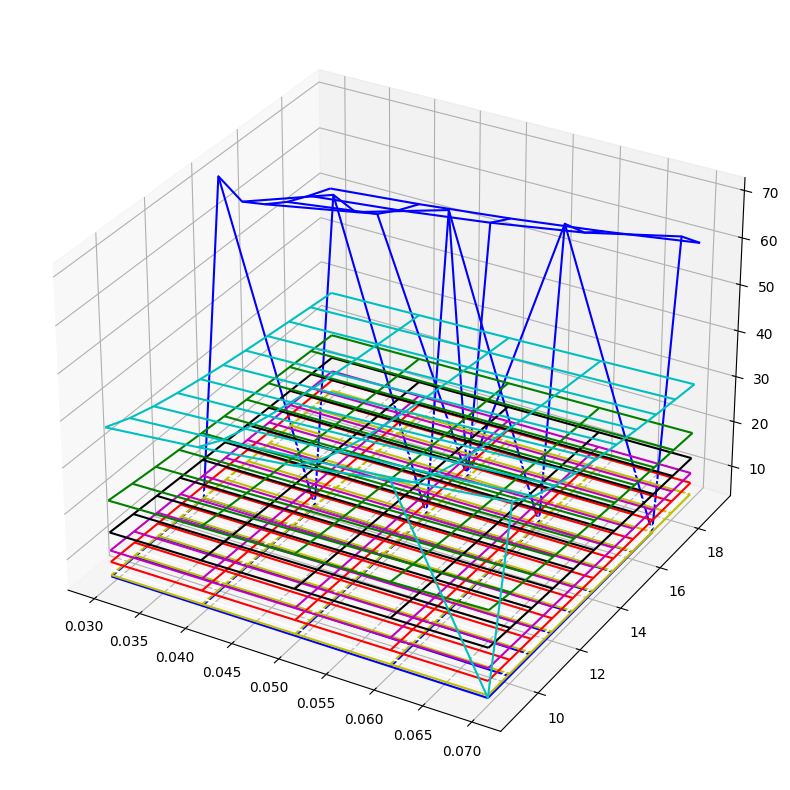

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"}, figsize=(10,10))
for i in range(0, len(d_split)):
    ax.plot_wireframe(splits_data[i][0], splits_data[i][1], splits_data[i][2], color=color_split[i])


plt.show()

In [5]:
output_file_path = r"2Таблица(d=0.4-1.3)(n=50)test.tex"
filepaths.spl.generate_simple_tex_file(output_file_path)
for i in range(0, len(splits_data)):
    d_it_table_string = filepaths.spl.generate_table_of_split_data_in_tex(round(d_split[i].m, 4), splits_data[i][0], splits_data[i][1], splits_data[i][2], splits_data[i][3])
    filepaths.spl.add_smt_to_existing_file(output_file_path, d_it_table_string)
